In [ ]:
!pip install --upgrade gspread gspread_dataframe --quiet

In [ ]:
import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe
from google.colab import auth

auth.authenticate_user()

In [ ]:
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
sheet = gc.open("FDIRRI_India_and_Top_Partners").sheet1

In [ ]:
df = get_as_dataframe(sheet, evaluate_formulas=True)
df = df.dropna(how="all").dropna(axis=1, how="all")
df["Country"] = df["Country"].fillna(method="ffill")
df.head()

/tmp/ipython-input-6-3697560845.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Country"] = df["Country"].fillna(method="ffill")


,Country,Sector,Total (0 - 1),Foreign equity limits (0 - 1),Screening and approval (0 - 1),Restrictions on key foreign personnel (0 - 1),Other restrictions (0 - 1)
0,India,Retail trade,0.04397,0.03225,0.00563,0.00000,0.00609
1,India,Wholesale trade,0.00000,0.00000,0.00000,0.00000,0.00000
2,India,Transport and storage except postal and courie...,0.00720,0.00480,0.00160,0.00080,0.00000
3,India,"Accommodation, food service and other touristi...",0.00000,0.00000,0.00000,0.00000,0.00000
4,India,Media activities,0.00675,0.00563,0.00094,0.00019,0.00000


In [ ]:
pivot_df = df.pivot(index='Sector', columns='Country', values='Total (0 - 1)')
pivot_df.head()

Country,Germany,India,Japan,Mauritius,Netherlands,Singapore,United Kingdom,United States
Sector,,,,,,,,
"Accommodation, food service and other touristic, artistic, entertainment and recreational activities",0.0000,0.00000,0.00000,0.00416,0.0000,0.00061,0.0000,0.00000
Banking,0.0000,0.01500,0.00000,0.00300,0.0000,0.00161,0.0000,0.00525
"Insurance, reinsurance and pension activities",0.0000,0.00544,0.00000,0.00075,0.0000,0.00026,0.0000,0.00000
Media activities,0.0000,0.00675,0.00581,0.00563,0.0000,0.00939,0.0000,0.00675
"Other financial service activities, except insurance and pension funding activities",0.0001,0.00053,0.00000,0.00069,0.0001,0.00018,0.0001,0.00017


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
countries = pivot_df.columns
heterogeneity_matrix = pd.DataFrame(index=countries, columns=countries)

#for computing pairwise average absolute differences:
for c1 in countries:
    for c2 in countries:
        diff = np.abs(pivot_df[c1] - pivot_df[c2])
        heterogeneity_matrix.loc[c1, c2] = diff.mean()

heterogeneity_matrix = heterogeneity_matrix.astype(float)
heterogeneity_matrix.head()

Country,Germany,India,Japan,Mauritius,Netherlands,Singapore,United Kingdom,United States
Country,,,,,,,,
Germany,0.000000,0.016450,0.002470,0.003985,0.000024,0.004432,0.000784,0.002268
India,0.016450,0.000000,0.017431,0.014793,0.016474,0.013675,0.016975,0.016160
Japan,0.002470,0.017431,0.000000,0.004111,0.002446,0.004707,0.003254,0.001340
Mauritius,0.003985,0.014793,0.004111,0.000000,0.003961,0.002971,0.004768,0.003584
Netherlands,0.000024,0.016474,0.002446,0.003961,0.000000,0.004408,0.000807,0.002245


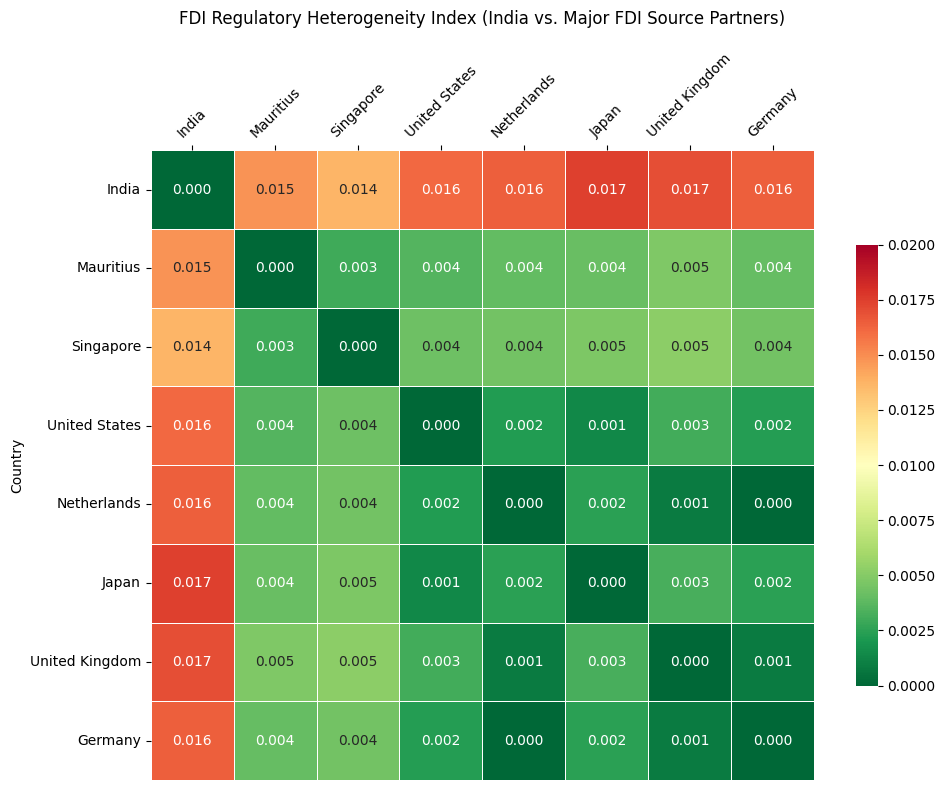

In [ ]:
desired_order = [
    "India",
    "Mauritius",
    "Singapore",
    "United States",
    "Netherlands",
    "Japan",
    "United Kingdom",
    "Germany"
]

heterogeneity_matrix = heterogeneity_matrix.loc[desired_order, desired_order]

plt.figure(figsize=(10, 8))

ax = sns.heatmap(
    heterogeneity_matrix,
    annot=True,
    fmt=".3f",
    cmap='RdYlGn_r',
    linewidths=0.5,
    vmin=0,
    vmax=0.02,
    cbar_kws={'shrink': 0.7}
)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("FDI Regulatory Heterogeneity Index (India vs. Major FDI Source Partners)", fontsize=12, labelpad=20)
plt.tight_layout()
plt.show()

In [ ]:
sheet_dest = gc.open("FDIRRI_India_and_Top_Partners").worksheet("FDI destinations")
df_dest = get_as_dataframe(sheet_dest, evaluate_formulas=True)
df_dest = df_dest.dropna(how="all").dropna(axis=1, how="all")
df_dest["Country"] = df_dest["Country"].fillna(method="ffill")
pivot_dest = df_dest.pivot(index='Sector', columns='Country', values='Total (0 - 1)')

/tmp/ipython-input-12-4201501837.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_dest["Country"] = df_dest["Country"].fillna(method="ffill")


In [ ]:
countries_dest = pivot_dest.columns
heterogeneity_dest = pd.DataFrame(index=countries_dest, columns=countries_dest)

In [ ]:
for c1 in countries_dest:
    for c2 in countries_dest:
        diff = np.abs(pivot_dest[c1] - pivot_dest[c2])
        heterogeneity_dest.loc[c1, c2] = diff.mean()

heterogeneity_dest = heterogeneity_dest.astype(float)

In [ ]:
desired_order_dest = [
    "India",
    "Singapore",
    "Mauritius",
    "Netherlands",
    "United States",
    "United Kingdom",
    "Switzerland",
    "Mozambique",
    "Australia",
    "Saudi Arabia"
]
heterogeneity_dest = heterogeneity_dest.loc[desired_order_dest, desired_order_dest]

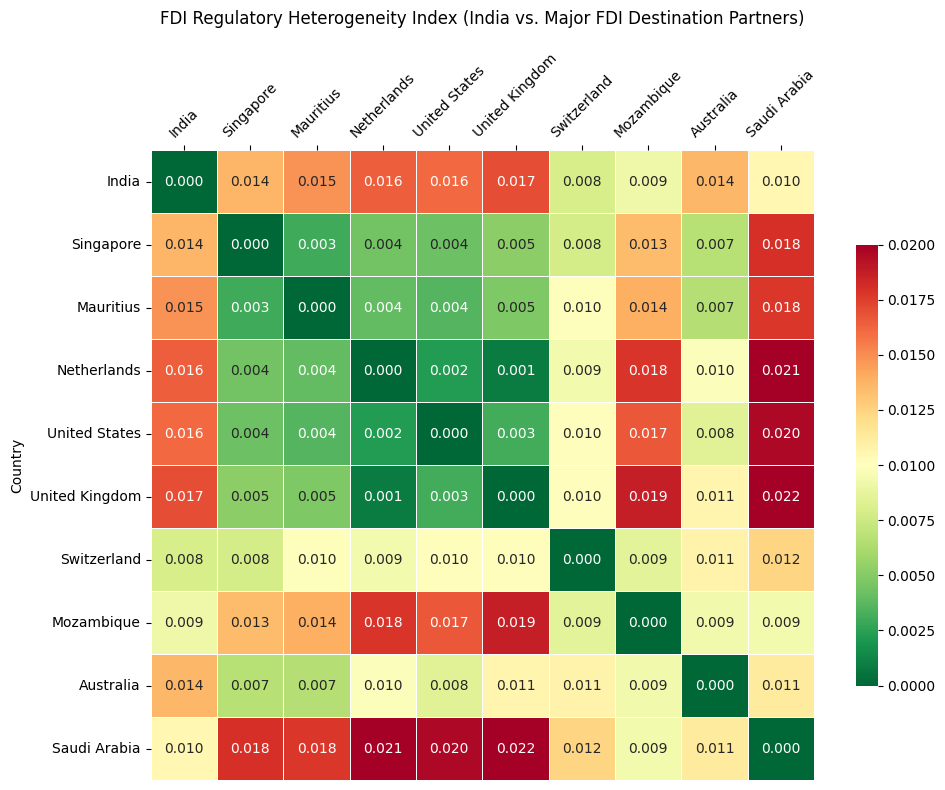

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    heterogeneity_dest,
    annot=True,
    fmt=".3f",
    cmap='RdYlGn_r',
    linewidths=0.5,
    vmin=0,
    vmax=0.02,
    cbar_kws={'shrink': 0.7}
)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("FDI Regulatory Heterogeneity Index (India vs. Major FDI Destination Partners)", fontsize=12, labelpad=20)
plt.tight_layout()
plt.show()